## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 17s 337us/step - loss: 1.9367 - acc: 0.3026 - val_loss: 1.7750 - val_acc: 0.3740
Epoch 2/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.6960 - acc: 0.3936 - val_loss: 1.6556 - val_acc: 0.4091
Epoch 3/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.6146 - acc: 0.4239 - val_loss: 1.6038 - val_acc: 0.4274
Epoch 4/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.5428 - acc: 0.4516 - val_loss: 1.5348 - val_acc: 0.4534
Epoch 5/500
50000/50000 [==============================] - 15s 310us/step - loss: 1.5009 - acc: 0.4642 - val_loss: 1.5279 - val_acc: 0.4668
Epoch 6/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.4559 - acc: 0.4829 - val_loss: 1.4839 - val_acc: 0.4697
Epoch 7/500
50000/50000 [==============================] - 14s

Epoch 57/500
50000/50000 [==============================] - 13s 270us/step - loss: 0.5452 - acc: 0.8057 - val_loss: 2.0090 - val_acc: 0.5089
Epoch 58/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.5379 - acc: 0.8075 - val_loss: 2.0576 - val_acc: 0.5000
Epoch 59/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.5363 - acc: 0.8097 - val_loss: 2.0449 - val_acc: 0.5115
Epoch 60/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.5159 - acc: 0.8144 - val_loss: 2.0988 - val_acc: 0.5023
Epoch 61/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.5080 - acc: 0.8170 - val_loss: 2.1704 - val_acc: 0.5039
Epoch 62/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.5030 - acc: 0.8191 - val_loss: 2.2082 - val_acc: 0.5036
Epoch 63/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.4856 - acc: 0.8261 - val_loss: 2.1912 - val_acc: 0.5021
Epoch 64/500


50000/50000 [==============================] - 13s 265us/step - loss: 0.2336 - acc: 0.9170 - val_loss: 3.4336 - val_acc: 0.4956
Epoch 114/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.2160 - acc: 0.9217 - val_loss: 3.4222 - val_acc: 0.4968
Epoch 115/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.2271 - acc: 0.9177 - val_loss: 3.4756 - val_acc: 0.4947
Epoch 116/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.2510 - acc: 0.9095 - val_loss: 3.4388 - val_acc: 0.4901
Epoch 117/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.2073 - acc: 0.9253 - val_loss: 3.6212 - val_acc: 0.4898
Epoch 118/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.2454 - acc: 0.9116 - val_loss: 3.5796 - val_acc: 0.4873
Epoch 119/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.2537 - acc: 0.9094 - val_loss: 3.6431 - val_acc: 0.4951
Epoch 120/500
50000/

50000/50000 [==============================] - 13s 257us/step - loss: 0.2415 - acc: 0.9176 - val_loss: 4.2687 - val_acc: 0.4901
Epoch 171/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.1678 - acc: 0.9414 - val_loss: 4.2522 - val_acc: 0.4954
Epoch 172/500
50000/50000 [==============================] - 13s 258us/step - loss: 0.1390 - acc: 0.9509 - val_loss: 4.2172 - val_acc: 0.4937
Epoch 173/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.1128 - acc: 0.9598 - val_loss: 4.3424 - val_acc: 0.4884
Epoch 174/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.1536 - acc: 0.9458 - val_loss: 4.2595 - val_acc: 0.4941
Epoch 175/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.2081 - acc: 0.9264 - val_loss: 4.2841 - val_acc: 0.4874
Epoch 176/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.1766 - acc: 0.9375 - val_loss: 4.2759 - val_acc: 0.4902
Epoch 177/500
50000/

50000/50000 [==============================] - 13s 266us/step - loss: 0.1362 - acc: 0.9532 - val_loss: 4.6559 - val_acc: 0.4906
Epoch 228/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.1149 - acc: 0.9599 - val_loss: 4.7699 - val_acc: 0.4926
Epoch 229/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.1026 - acc: 0.9644 - val_loss: 4.6940 - val_acc: 0.4949
Epoch 230/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0824 - acc: 0.9716 - val_loss: 4.7063 - val_acc: 0.4919
Epoch 231/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.1164 - acc: 0.9597 - val_loss: 4.8476 - val_acc: 0.4832
Epoch 232/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.1664 - acc: 0.9447 - val_loss: 4.8347 - val_acc: 0.4856
Epoch 233/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.1794 - acc: 0.9401 - val_loss: 4.7178 - val_acc: 0.4890
Epoch 234/500
50000/

50000/50000 [==============================] - 15s 291us/step - loss: 0.1290 - acc: 0.9567 - val_loss: 5.0172 - val_acc: 0.4808
Epoch 285/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.1109 - acc: 0.9624 - val_loss: 4.9820 - val_acc: 0.4937
Epoch 286/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.0671 - acc: 0.9769 - val_loss: 4.9718 - val_acc: 0.4852
Epoch 287/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0765 - acc: 0.9749 - val_loss: 5.1014 - val_acc: 0.482139 - 
Epoch 288/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.1250 - acc: 0.9579 - val_loss: 5.1538 - val_acc: 0.4790
Epoch 289/500
50000/50000 [==============================] - 16s 314us/step - loss: 0.1934 - acc: 0.9376 - val_loss: 5.0928 - val_acc: 0.4743
Epoch 290/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.1312 - acc: 0.9570 - val_loss: 4.9872 - val_acc: 0.4822
Epoch 291/500
5

50000/50000 [==============================] - 13s 253us/step - loss: 0.1404 - acc: 0.9565 - val_loss: 5.2435 - val_acc: 0.4781
Epoch 342/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.1283 - acc: 0.9589 - val_loss: 5.1512 - val_acc: 0.4914
Epoch 343/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0914 - acc: 0.9704 - val_loss: 5.2691 - val_acc: 0.4785
Epoch 344/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.1236 - acc: 0.9590 - val_loss: 5.0877 - val_acc: 0.4888
Epoch 345/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.0834 - acc: 0.9719 - val_loss: 5.2213 - val_acc: 0.4891
Epoch 346/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.0893 - acc: 0.9702 - val_loss: 5.2167 - val_acc: 0.4845
Epoch 347/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.1269 - acc: 0.9587 - val_loss: 5.1338 - val_acc: 0.4851
Epoch 348/500
50000/

Epoch 399/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.0873 - acc: 0.9710 - val_loss: 5.2705 - val_acc: 0.4873
Epoch 400/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.1501 - acc: 0.9535 - val_loss: 5.3102 - val_acc: 0.4879
Epoch 401/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1098 - acc: 0.9642 - val_loss: 5.2930 - val_acc: 0.4862
Epoch 402/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.0508 - acc: 0.9835 - val_loss: 5.3257 - val_acc: 0.4906
Epoch 403/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.0381 - acc: 0.9873 - val_loss: 5.3476 - val_acc: 0.4879
Epoch 404/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.0898 - acc: 0.9702 - val_loss: 5.2449 - val_acc: 0.4893
Epoch 405/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0763 - acc: 0.9746 - val_loss: 5.2537 - val_acc: 0.4920
Epoch 

50000/50000 [==============================] - 14s 283us/step - loss: 0.1065 - acc: 0.9673 - val_loss: 5.4356 - val_acc: 0.4850
Epoch 457/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.1061 - acc: 0.9664 - val_loss: 5.4383 - val_acc: 0.4841
Epoch 458/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0584 - acc: 0.9802 - val_loss: 5.3349 - val_acc: 0.4916
Epoch 459/500
50000/50000 [==============================] - 14s 290us/step - loss: 0.0465 - acc: 0.9844 - val_loss: 5.5708 - val_acc: 0.4825
Epoch 460/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.0601 - acc: 0.9795 - val_loss: 5.4504 - val_acc: 0.4848
Epoch 461/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.1327 - acc: 0.9594 - val_loss: 5.5494 - val_acc: 0.4793
Epoch 462/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.1024 - acc: 0.9676 - val_loss: 5.5117 - val_acc: 0.4748
Epoch 463/500
50000/

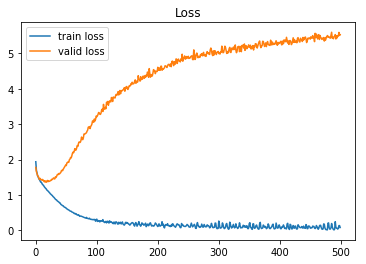

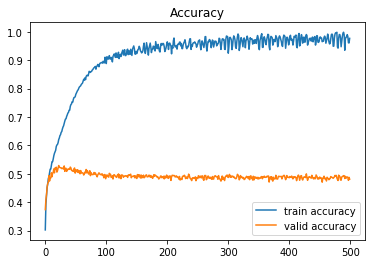

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()